# Use linear transforms between successive frames to straighten video

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import affine_transform
from scipy.stats import multivariate_normal
from scipy.io import loadmat 

from otimage import readers, imagerep
from otimage.utils import plot_maxproj

In [7]:
# Frame index in raw Zimmer file
t_frame = 502

# Load two successive frames from Zimmer dataset
img_path = '/home/mn2822/Desktop/WormOT/data/zimmer/mCherry_v00065-01581.hdf5'
with readers.ZimmerReader(img_path) as reader:
    frame_1 = reader.get_frame(t_frame)
    frame_2 = reader.get_frame(t_frame + 1)

# Frame index for files starting at frame 500
k_frame = t_frame - 500

# Load MP components
mp_path = '/home/mn2822/Desktop/WormOT/data/zimmer/gmm_components/vid_0500_0550.mat'
mp_data = loadmat(mp_path)
cov = mp_data['cov']
pts_1 = mp_data['means'][k_frame, :, :]
pts_2 = mp_data['means'][k_frame + 1, :, :]
wts_1 = mp_data['weights'][k_frame, :, 0]
wts_2 = mp_data['weights'][k_frame + 1, :, 0]

# Load frame-to-frame transformations
reg_path = '/home/mn2822/Desktop/WormOT/data/zimmer/mappings/map_0500_0550.mat'
reg_data = loadmat(reg_path)
alpha = reg_data['alphas'][k_frame, :]
beta = reg_data['betas'][k_frame, :, :]

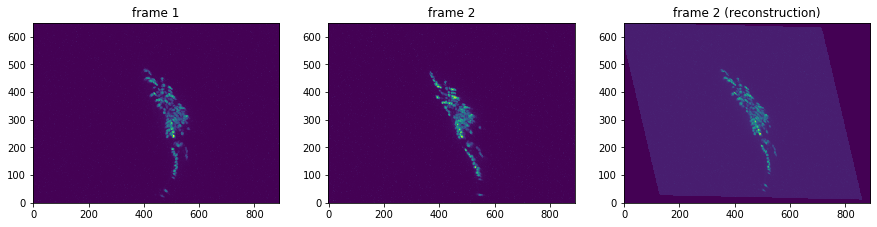

In [8]:
# Apply linear transform to first frame to "reconstruct" second frame
inv_beta = np.linalg.inv(beta)
inv_alpha = -inv_beta @ alpha
frame_2_recon = affine_transform(frame_1, inv_beta, inv_alpha)

plt.figure(figsize=(15, 15))

plt.subplot(131)
plot_maxproj(frame_1)
plt.title('frame 1')
        
plt.subplot(132)
plot_maxproj(frame_2)
plt.title('frame 2')
        
plt.subplot(133)
plot_maxproj(frame_2_recon)
plt.title('frame 2 (reconstruction)');

In [ ]:
#img_shape = frame_1.shape
#mp_img_1 = imagerep.reconstruct_image(pts_1, [cov], wts_1, img_shape)
#mp_img_2 = imagerep.reconstruct_image(pts_2, [cov], wts_2, img_shape)

In [ ]:
#plt.figure(figsize=(10, 10))

#plt.subplot(221)
#plot_maxproj(frame_1)
#plt.title('frame 1')
        
#plt.subplot(222)
#plot_maxproj(frame_2)
#plt.title('frame 2')

#plt.subplot(223)
#plot_maxproj(mp_img_1)
#plt.title('MP reconstruction')

#plt.subplot(224)
#plot_maxproj(mp_img_2)
#plt.title('MP reconstruction');